# Sheet 6: Solution

In [63]:
options(jupyter.plot_mimetypes = 'image/png',repr.plot.width=4,repr.plot.height=4) # this is just to render graphics as png and not as svg, and to adjust the default size

## Exercise 1

(a) See e.g. Murphy (2012) page 99 for the proof.
$$
N_k = \sum_{i=1}^{N} \mathbb{I}(g_i=k)
$$

$$
\hat\mu_k  = \frac{1}{N_k} \sum_{i=1}^{N} \mathbb{I}(g_i=k) x_i
$$

$$
\hat\Sigma_k = \frac{1}{N_k} \sum_{i=1}^{N} (x_i - \hat\mu_k)(x_i - \hat\mu_k)^T \mathbb{I}(g_i=k)
$$

Clearly, these are closed-form solutions, which are easy to compute.

(b) GDA models the full probability distribution $P(g,x)$ of output $G$ and features $X$. Linear regression for classification (a more advanced version will be logist regression) only models $P(g|x)$, that is, assumes the values of the features $X$ to be given. The former is able can be used to sample the complete data (generative model), while the latter is not able to do so (discriminative model). 

If the data is Gaussian distributed, the stronger restriction of GDA will allow to obtain a lower variance in the predicition error (better performance) given the same amount of training data. If the data is not Gaussian, the higher flexibility of the logit regression will usually allow to obtain better results. There would be many further issues to mention here, one of the most important is that GDA can be easily adapted to the unsupervised case, whereas logit regression cannot.

(c) Let us now see whether the GDA and LDA can do better than linear regression on the previous problem.

First we read the training data from the files related to 2's and 3's

In [64]:
library(MASS)
train2 <- read.table('train.2',sep=",") 
train3 <- read.table('train.3',sep=",")

l2train <- nrow(train2) 
l3train <- nrow(train3)
print(l2train)
print(l3train)
train <- rbind(train2,train3)

train <- as.matrix(train) 

response2 <- rep(-1,times=l2train)
response3 <- rep( 1,times=l3train)
response <- c(response2,response3)

ltrain <- length(response)
digit.train <- as.data.frame(train[,-16])
dim(digit.train)
# digit.train <- data.frame(train,Sp = response)
digit.lda <-lda(response~., digit.train)
# digit.lda <-lda(formula = Sp~.,data = digit.train, prior = c(l2train,l3train)/(l2train+l3train))

[1] 731
[1] 658


[1] 1389  255

In [65]:
training.error <- 1-sum(predict(digit.lda, digit.train)$class==response)/ltrain
# print(predict(digit.lda, as.data.frame(train[,-16]))$class)
print(training.error)

[1] 0.005759539


Test the algotihm on the data from corresponding files by calculating the residual error. Find out proportion of misclassified examples.

In [66]:
test<-read.table('zip.test',sep=" ")
test2 <- subset(test, test[,1] == 2)
test3 <- subset(test, test[,1] == 3)

l2test <- nrow(test2) 
l3test <- nrow(test3)

test <- rbind(test2,test3) 
test <- as.matrix(test)

testresponse2 <- rep(-1,times=l2test) 
testresponse3 <- rep( 1,times=l3test) 

testresponse <- c(testresponse2,testresponse3) 
# print(testresponse)
ltest <- length(testresponse)
print(ltest)


[1] 364


In [67]:
digit.test = as.data.frame(test[,c(-1,-16)])

names(digit.test) <- names(digit.train)
dim(digit.test)
test.error <- 1-sum(predict(digit.lda, digit.test)$class==testresponse)/ltest
# print(predict(digit.lda, digit.test)$class)
print(test.error)

[1] 364 255

[1] 0.04120879


Are we better or worse than with linear regression? It is better than linear regression. In general, linear regression is not a good method for classification, an extension of linear regression for classification is logistic regression, which is much more powerful in classification.

## Exercise 2

In the wine data set, we have 13 chemical concentrations describing wine samples from three cultivars.

In [70]:
library(car) 
url <- 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine <- read.csv(url,sep = ",", header = FALSE)
names(wine) <- c("Type", "Alcohol", "Malic acid", "Ash" ,"Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids",
                 "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines",
                 "Proline")
head(wine)
nrow(wine)

Type,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


[1] 178

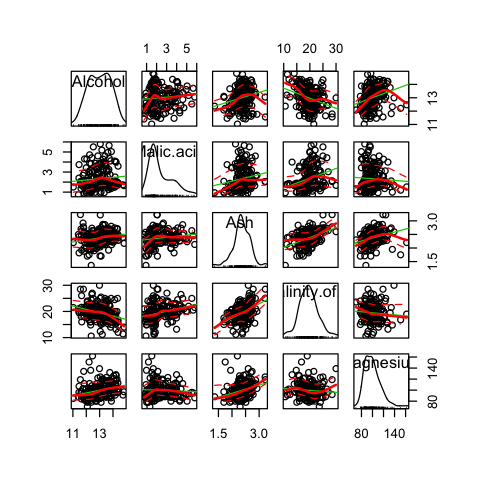

In [71]:
scatterplotMatrix(wine[2:6])

The purpose of linear discriminant analysis (LDA) in this example is to find the linear combinations of the original variables (the 13 chemical concentrations here) that gives the best possible separation between the groups (wine cultivars here) in our data set. Linear discriminant analysis is also known as “canonical discriminant analysis”, or simply “discriminant analysis”.

If we want to separate the wines by cultivar, the wines come from three different cultivars, so the number of groups $G=3$, and the number of variables is 13 (13 chemicals’ concentrations; $p=13$). The maximum number of useful discriminant functions that can separate the wines by cultivar is the minimum of $G−1$
and $p$, and so in this case it is the minimum of 2 and 13, which is 2. Thus, we can find at most 2 useful discriminant functions to separate the wines by cultivar, using the 13 chemical concentration variables.
For futher explanation, please refer to http://multivariatestatsjl.readthedocs.io/en/latest/mclda.html

In [57]:
wine.lda <- lda(Type ~ ., data=wine)
wine.lda

Call:
lda(Type ~ ., data = wine)

Prior probabilities of groups:
        1         2         3 
0.3314607 0.3988764 0.2696629 

Group means:
   Alcohol `Malic acid`      Ash `Alcalinity of ash` Magnesium `Total phenols`
1 13.74475     2.010678 2.455593            17.03729  106.3390        2.840169
2 12.27873     1.932676 2.244789            20.23803   94.5493        2.258873
3 13.15375     3.333750 2.437083            21.41667   99.3125        1.678750
  Flavanoids `Nonflavanoid phenols` Proanthocyanins `Color intensity`       Hue
1  2.9823729               0.290000        1.899322          5.528305 1.0620339
2  2.0808451               0.363662        1.630282          3.086620 1.0562817
3  0.7814583               0.447500        1.153542          7.396250 0.6827083
  `OD280/OD315 of diluted wines`   Proline
1                       3.157797 1115.7119
2                       2.785352  519.5070
3                       1.683542  629.8958

Coefficients of linear discriminants:
            

This means that the first discriminant function is a linear combination of the variables: −0.403∗Alcohol+0.165∗Malic⋯−0.003∗Proline. For convenience, the value for each discriminant function (eg. the first discriminant function) are scaled so that their mean value is zero and its variance is one.

The “proportion of trace” that is printed when you type “wine.lda” (the variable returned by the lda() function) is the percentage separation achieved by each discriminant function. For example, for the wine data we get the same values as just calculated (68.75% and 31.25%).

**A Stacked Histogram of the LDA Values**

A nice way of displaying the results of a linear discriminant analysis (LDA) is to make a stacked histogram of the values of the discriminant function for the samples from different groups (different wine cultivars in our example).

We can do this using the “ldahist()” function in R. For example, to make a stacked histogram of the first discriminant function’s values for wine samples of the three different wine cultivars, we type:

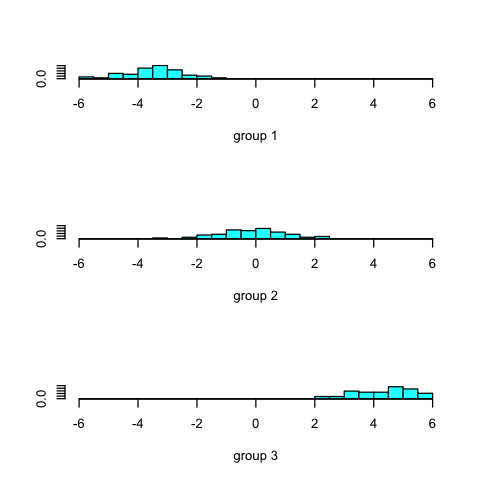

In [58]:
wine.lda.values <- predict(wine.lda)
ldahist(data = wine.lda.values$x[,1], g = wine$Type)

Second discriminant function:

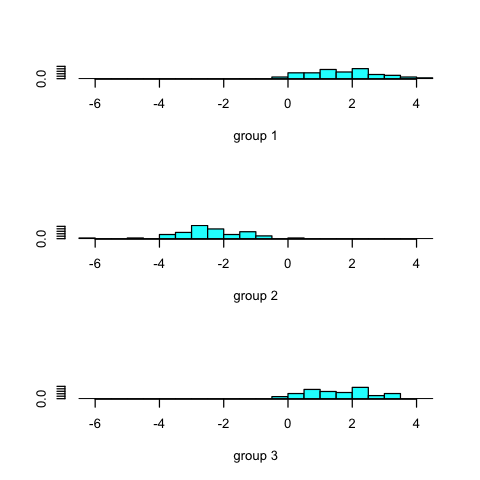

In [59]:
ldahist(data = wine.lda.values$x[,2], g=wine$Type)

**Scatterplots of the Discriminant Functions**

We can obtain a scatterplot of the best two discriminant functions, with the data points labelled by cultivar, by typing:

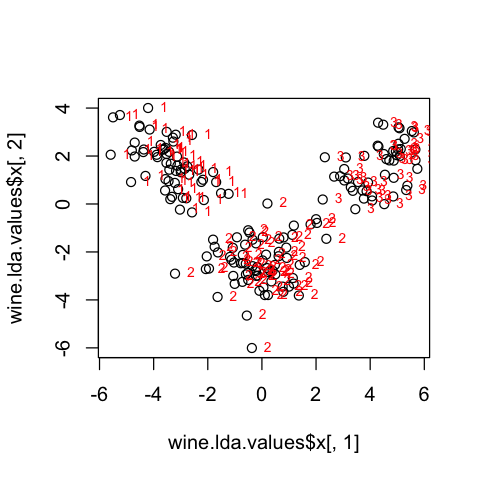

In [72]:
plot(wine.lda.values$x[,1],wine.lda.values$x[,2]) # make a scatterplot
text(wine.lda.values$x[,1],wine.lda.values$x[,2],wine$Type,cex=0.7,pos=4,col="red") # add labels